In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 1. 수치형변수 처리

In [2]:
df = pd.read_csv('취합데이터셋.csv', thousands=',')
df.head()

,기준_년_코드,역명,호선,지하철이용객수,자전거보관가능대수,환승거리,환승역개수,엘리베이터,에스컬레이터,휠체어경사로,...,구간이동전입.1,구간이동전출.1,시도간이동전입.1,시도간이동전출.1,거주_세대_수.1,거주인구_총계.1,거주인구_남자.1,거주인구_여자.1,세대당인구.1,고령자_65세이상.1
0,2016,4.19민주묘지역,우이신설,23032224,109,0,0,3,6,2,...,1009,1238,2476,925,9489,21391,10393,10998,2,4557
1,2016,가락시장역,3,6592791,261,35,2,3,22,1,...,4445,1017,12170,1265,11345,29837,14646,15191,2,3321
2,2016,가락시장역,8,5505123,152,35,2,6,12,1,...,4445,1017,12170,1265,11345,29837,14646,15191,2,3321
3,2016,가산디지털단지역,7,29369671,121,110,1,4,12,2,...,1908,1930,5440,2462,13767,24455,13720,10735,1,2414
4,2016,가양역,9,6792723,127,16,4,3,6,2,...,2532,1872,5831,1778,15720,42579,20772,21807,2,3963


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Columns: 113 entries, 기준_년_코드 to 고령자_65세이상.1
dtypes: int64(106), object(7)
memory usage: 295.8+ KB


In [4]:
df.columns

Index(['기준_년_코드', '역명', '호선', '지하철이용객수', '자전거보관가능대수', '환승거리', '환승역개수', '엘리베이터',
       '에스컬레이터', '휠체어경사로',
       ...
       '구간이동전입.1', '구간이동전출.1', '시도간이동전입.1', '시도간이동전출.1', '거주_세대_수.1',
       '거주인구_총계.1', '거주인구_남자.1', '거주인구_여자.1', '세대당인구.1', '고령자_65세이상.1'],
      dtype='object', length=113)

### 데이터 타입 변환(범주형/수치형)

### 범주형 변수 처리

In [5]:
# 범주형 변수 타입 변환 및 df_cat으로 분리
num_col = ['지하철이용객수', '자전거보관가능대수', '환승거리', '환승역개수', '엘리베이터', '에스컬레이터', '휠체어경사로', '휠체어리프트']
cat_col = df.drop(columns=num_col, axis=1).columns
cat_col = df[cat_col].astype('category').columns
df_cat = df[cat_col]
df_cat.head()

,기준_년_코드,역명,호선,장애인편의시설,만남의장소,현장사무소,민원안내,환승주차장,자치구명,기준_년_코드.1,...,구간이동전입.1,구간이동전출.1,시도간이동전입.1,시도간이동전출.1,거주_세대_수.1,거주인구_총계.1,거주인구_남자.1,거주인구_여자.1,세대당인구.1,고령자_65세이상.1
0,2016,4.19민주묘지역,우이신설,0,0,0,0,0,강북구,2017,...,1009,1238,2476,925,9489,21391,10393,10998,2,4557
1,2016,가락시장역,3,0,0,0,0,0,송파구,2017,...,4445,1017,12170,1265,11345,29837,14646,15191,2,3321
2,2016,가락시장역,8,1,0,0,0,0,송파구,2017,...,4445,1017,12170,1265,11345,29837,14646,15191,2,3321
3,2016,가산디지털단지역,7,1,0,0,0,0,금천구,2017,...,1908,1930,5440,2462,13767,24455,13720,10735,1,2414
4,2016,가양역,9,0,0,0,0,0,강서구,2017,...,2532,1872,5831,1778,15720,42579,20772,21807,2,3963


### 수치형 변수 처리

In [6]:
# 수치형 변수 타입 변환 및 df_num으로 분리
df_num = df[num_col]
df_num

,지하철이용객수,자전거보관가능대수,환승거리,환승역개수,엘리베이터,에스컬레이터,휠체어경사로,휠체어리프트
0,23032224,109,0,0,3,6,2,2
1,6592791,261,35,2,3,22,1,2
2,5505123,152,35,2,6,12,1,2
3,29369671,121,110,1,4,12,2,4
4,6792723,127,16,4,3,6,2,2
5,23032224,109,16,4,3,6,2,2
6,6043460,35,0,0,3,6,2,2
7,11658754,50,125,1,2,7,1,1
8,72991041,89,214,1,4,6,3,2
9,7663847,277,0,0,3,5,2,2


#### 이상치 탐색 (boxplot)

In [7]:
df_num_tmp = df_num.melt()
df_num_tmp

,variable,value
0,지하철이용객수,23032224
1,지하철이용객수,6592791
2,지하철이용객수,5505123
3,지하철이용객수,29369671
4,지하철이용객수,6792723
5,지하철이용객수,23032224
6,지하철이용객수,6043460
7,지하철이용객수,11658754
8,지하철이용객수,72991041
9,지하철이용객수,7663847


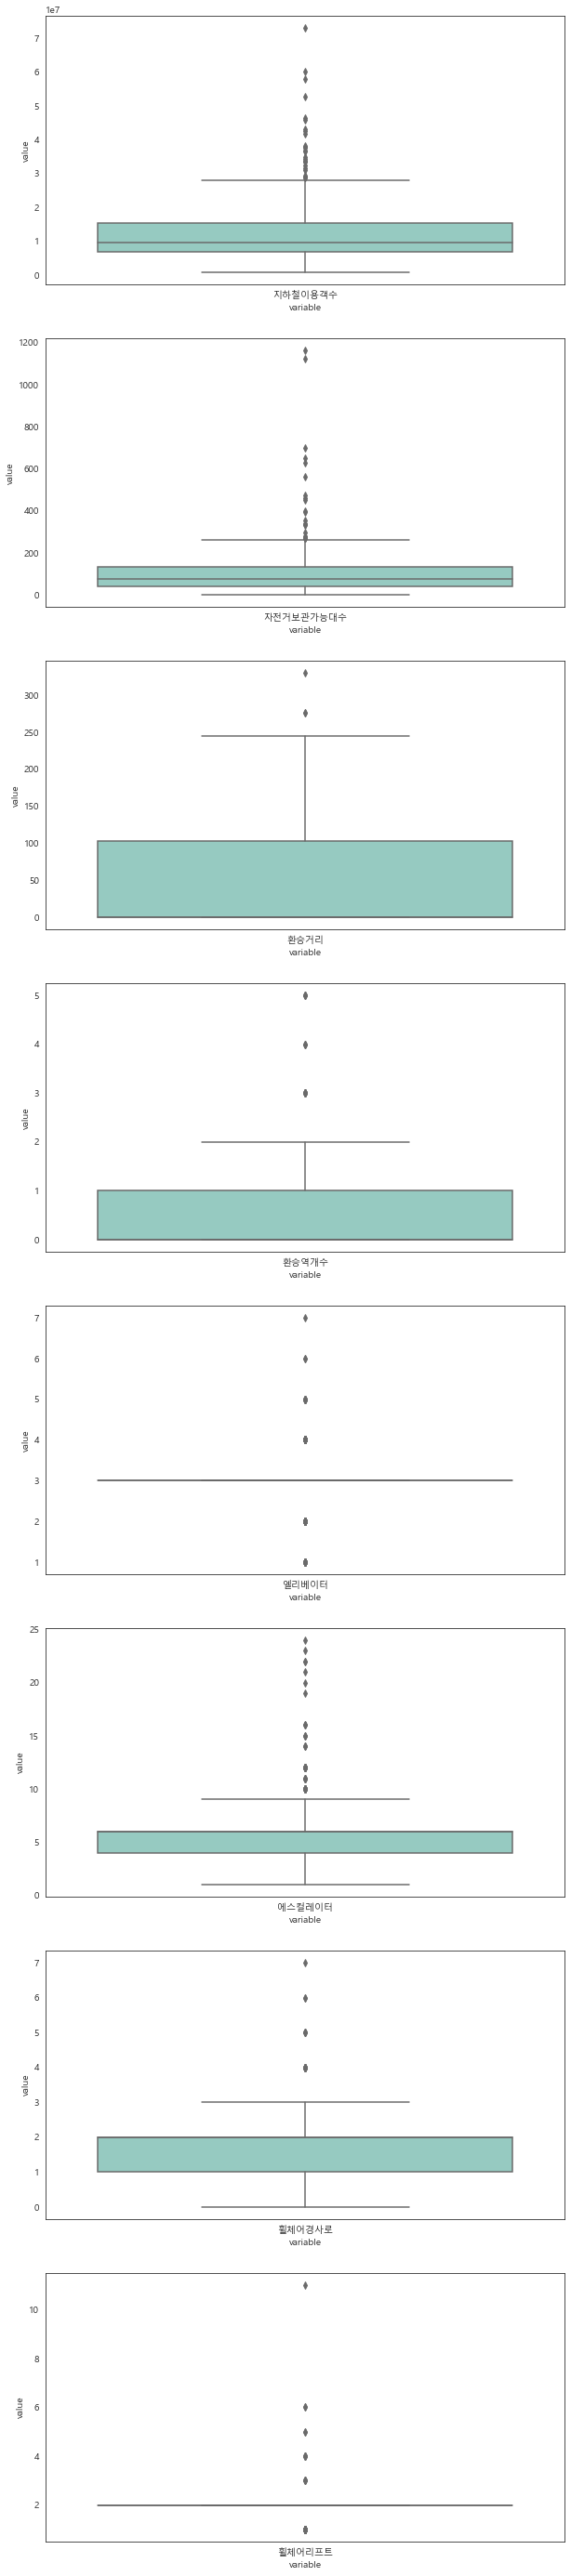

In [29]:
fig, ax = plt.subplots(nrows=df_num_tmp.variable.nunique(), ncols=1, figsize=(10,50))

for i, a in zip(df_num_tmp.variable.unique(), ax):
    sns.boxplot(x='variable', y='value', data=df_num_tmp[df_num_tmp.variable==i], ax=a, palette='Set3');

#### 0값이 많은 환승거리, 환승역개수에 대해 이상치 재탐색
- 0이 아닌 값들로 조건을 걸어 이상치 확인

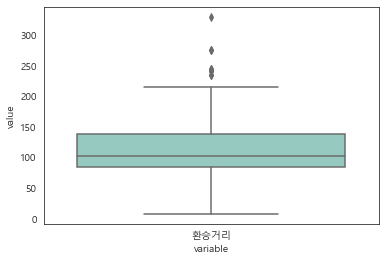

In [8]:
# 환승거리가 1 이상인 값들 추출
df_num_tmp1 = df_num_tmp[df_num_tmp.variable == '환승거리']
df_num_tmp1 = df_num_tmp1[df_num_tmp1.value >= 1]

# boxplot
sns.boxplot(x='variable', y='value', data=df_num_tmp1,  orient='v', palette='Set3')
plt.show()

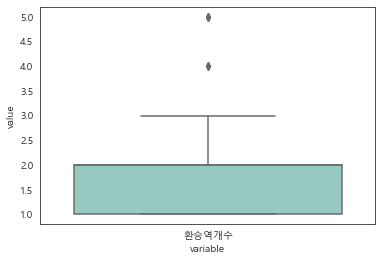

In [9]:
# 환승역개수가 1 이상인 값들만 추출
df_num_tmp2 = df_num_tmp[(df_num_tmp.variable == '환승역개수')]
df_num_tmp2 = df_num_tmp2[df_num_tmp2.value >= 1]
df_num_tmp2

# boxplot
sns.boxplot(x='variable', y='value', data=df_num_tmp2, orient='v', palette='Set3')
plt.show()

#### 이상치 처리
- 이상치 처리 대상 변수: 지하철이용객수, 자전거보관가능대수, 엘리베이터, 에스컬레이터, 휠체어리프트

In [10]:
# 이상치 탐색 함수 정의

def outliers_iqr(x):
    quartile_1, quartile_3 = np.percentile(x, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    index = np.where((x > upper_bound) | (x < lower_bound))
    return index

In [11]:
# 기본 통계량 확인
df_num[['지하철이용객수', '자전거보관가능대수', '엘리베이터', '에스컬레이터', '휠체어리프트']].describe().T

,count,mean,std,min,25%,50%,75%,max
지하철이용객수,335.0,1.294957e+07,1.006774e+07,804076.0,6792723.0,9715518.0,15315082.0,72991041.0
자전거보관가능대수,335.0,1.131373e+02,1.295211e+02,1.0,41.0,77.0,132.0,1162.0
엘리베이터,335.0,2.967164e+00,8.968321e-01,1.0,3.0,3.0,3.0,7.0
에스컬레이터,335.0,6.441791e+00,3.670817e+00,1.0,4.0,6.0,6.0,24.0
휠체어리프트,335.0,2.023881e+00,7.578115e-01,1.0,2.0,2.0,2.0,11.0


In [13]:
# 이상치 처리
df_num.지하철이용객수 = df_num.지하철이용객수.clip(upper=45893988)
df_num.자전거보관가능대수 = df_num.자전거보관가능대수.clip(upper=400)
df_num.엘리베이터 = df_num.엘리베이터.clip(upper=4)
df_num.에스컬레이터 = df_num.에스컬레이터.clip(upper=14)
df_num.휠체어리프트 = df_num.휠체어리프트.clip(upper=4)


# 기본 통계량 재확인
df_num[['지하철이용객수', '자전거보관가능대수', 
        '엘리베이터', '에스컬레이터', '휠체어리프트']].describe().T

,count,mean,std,min,25%,50%,75%,max
지하철이용객수,335.0,1.276855e+07,9.272798e+06,804076.0,6792723.0,9715518.0,15315082.0,45893988.0
자전거보관가능대수,335.0,1.053493e+02,9.056744e+01,1.0,41.0,77.0,132.0,400.0
엘리베이터,335.0,2.910448e+00,7.724939e-01,1.0,3.0,3.0,3.0,4.0
에스컬레이터,335.0,6.256716e+00,3.055339e+00,1.0,4.0,6.0,6.0,14.0
휠체어리프트,335.0,1.985075e+00,4.922312e-01,1.0,2.0,2.0,2.0,4.0


#### 수치형 변수 분포 확인

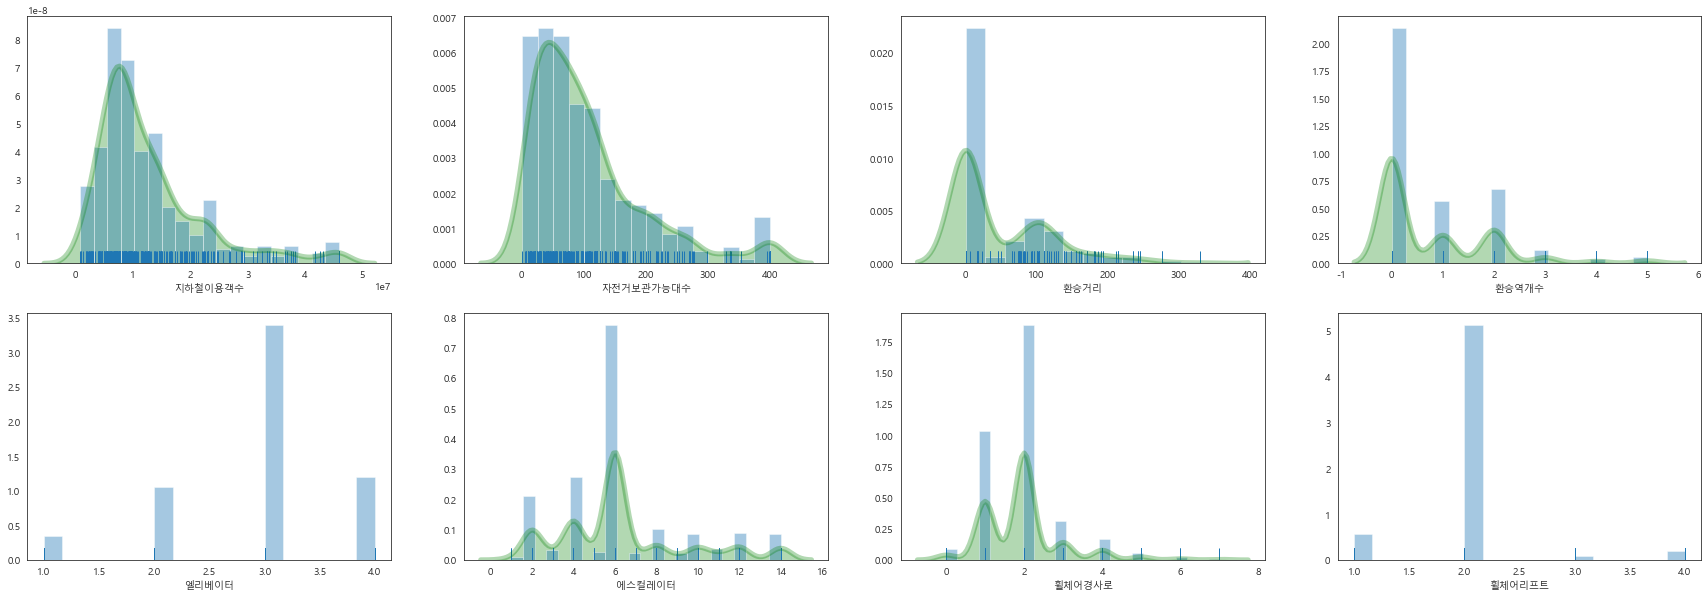

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (30,10))

p=0
for i in range(2):
    for j in range(4):
        sns.distplot(df_num.iloc[:,p], hist=True, kde=True, rug=True, ax=ax[i,j],
                    kde_kws={'color':'g', 'alpha':0.3, 'linewidth':5, 'shade':True})
        p += 1;

#### 로그 변환

In [15]:
df_num = np.log(df_num+1)

#### 수치형 변수 분포 재확인

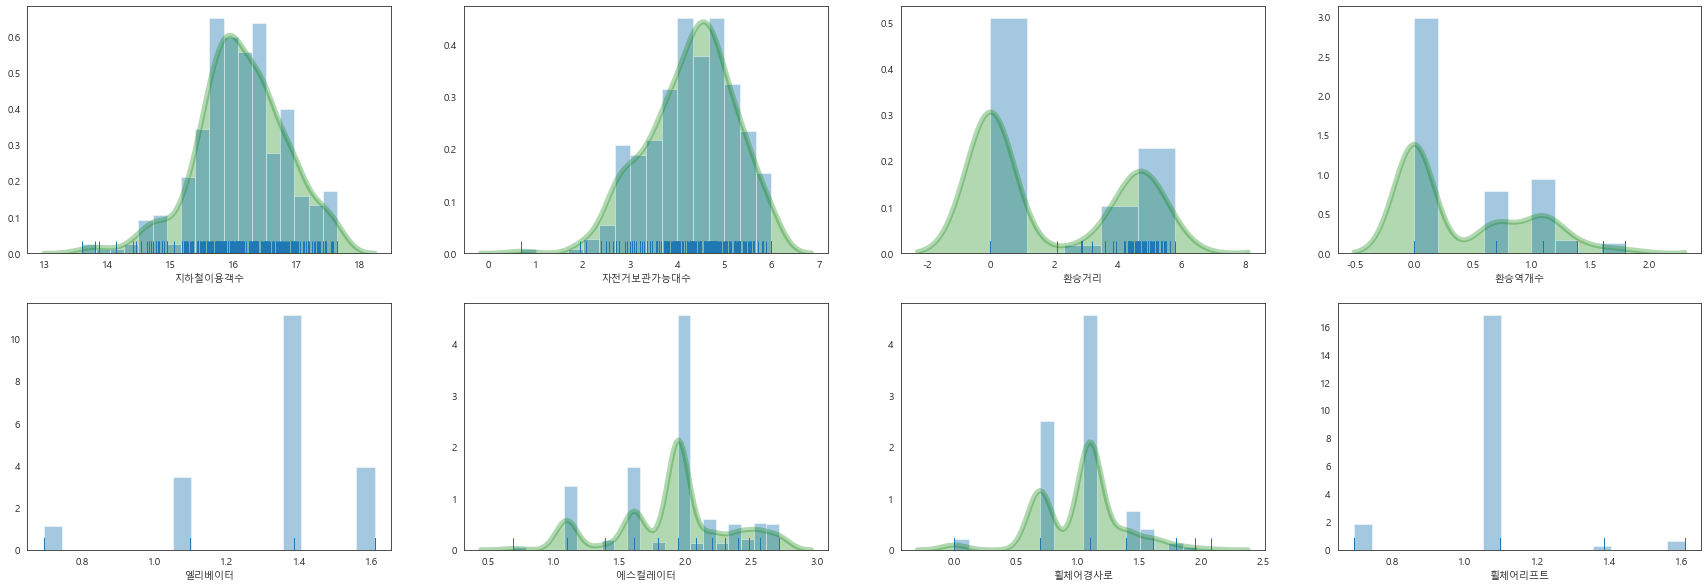

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (30,10))

p=0
for i in range(2):
    for j in range(4):
        sns.distplot(df_num.iloc[:,p], hist=True, kde=True, rug=True, ax=ax[i,j],
                    kde_kws={'color':'g', 'alpha':0.3, 'linewidth':5, 'shade':True})
        p += 1;

#### Rescaling: Min-Max Scaling

In [17]:
# Min-Max Scaling

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
df_num_final = minmax_scale.fit_transform(df_num)
df_num_final = pd.DataFrame(df_num_final)
df_num_final.columns = df_num.columns
df_num_final

,지하철이용객수,자전거보관가능대수,환승거리,환승역개수,엘리베이터,에스컬레이터,휠체어경사로,휠체어리프트
0,0.829532,0.755984,0.000000,0.000000,0.756471,0.621749,0.528321,0.442507
1,0.520235,0.919707,0.617623,0.613147,0.756471,1.000000,0.333333,0.442507
2,0.475656,0.818231,0.617623,0.613147,1.000000,0.928979,0.333333,0.442507
3,0.889632,0.775517,0.811692,0.386853,1.000000,0.928979,0.528321,1.000000
4,0.527622,0.784574,0.488307,0.898244,0.756471,0.621749,0.528321,0.442507
5,0.829532,0.755984,0.488307,0.898244,0.756471,0.621749,0.528321,0.442507
6,0.498724,0.545269,0.000000,0.000000,0.756471,0.621749,0.528321,0.442507
7,0.661191,0.610978,0.833537,0.386853,0.442507,0.688020,0.333333,0.000000
8,1.000000,0.718128,0.925634,0.386853,1.000000,0.621749,0.666667,0.442507
9,0.557457,0.930890,0.000000,0.000000,0.756471,0.545243,0.528321,0.442507


### 테이블 합치기

In [18]:
df_num

,지하철이용객수,자전거보관가능대수,환승거리,환승역개수,엘리베이터,에스컬레이터,휠체어경사로,휠체어리프트
0,16.952405,4.700480,0.000000,0.000000,1.386294,1.945910,1.098612,1.098612
1,15.701487,5.568345,3.583519,1.098612,1.386294,2.708050,0.693147,1.098612
2,15.521190,5.030438,3.583519,1.098612,1.609438,2.564949,0.693147,1.098612
3,17.195473,4.804021,4.709530,0.693147,1.609438,2.564949,1.098612,1.609438
4,15.731363,4.852030,2.833213,1.609438,1.386294,1.945910,1.098612,1.098612
5,16.952405,4.700480,2.833213,1.609438,1.386294,1.945910,1.098612,1.098612
6,15.614487,3.583519,0.000000,0.000000,1.386294,1.945910,1.098612,1.098612
7,16.271568,3.931826,4.836282,0.693147,1.098612,2.079442,0.693147,0.693147
8,17.641845,4.499810,5.370638,0.693147,1.609438,1.945910,1.386294,1.098612
9,15.852025,5.627621,0.000000,0.000000,1.386294,1.791759,1.098612,1.098612


In [19]:
df

,기준_년_코드,역명,호선,지하철이용객수,자전거보관가능대수,환승거리,환승역개수,엘리베이터,에스컬레이터,휠체어경사로,...,구간이동전입.1,구간이동전출.1,시도간이동전입.1,시도간이동전출.1,거주_세대_수.1,거주인구_총계.1,거주인구_남자.1,거주인구_여자.1,세대당인구.1,고령자_65세이상.1
0,2016,4.19민주묘지역,우이신설,23032224,109,0,0,3,6,2,...,1009,1238,2476,925,9489,21391,10393,10998,2,4557
1,2016,가락시장역,3,6592791,261,35,2,3,22,1,...,4445,1017,12170,1265,11345,29837,14646,15191,2,3321
2,2016,가락시장역,8,5505123,152,35,2,6,12,1,...,4445,1017,12170,1265,11345,29837,14646,15191,2,3321
3,2016,가산디지털단지역,7,29369671,121,110,1,4,12,2,...,1908,1930,5440,2462,13767,24455,13720,10735,1,2414
4,2016,가양역,9,6792723,127,16,4,3,6,2,...,2532,1872,5831,1778,15720,42579,20772,21807,2,3963
5,2016,가오리역,우이신설,23032224,109,16,4,3,6,2,...,1126,1287,2963,1058,11335,24339,11872,12466,2,4848
6,2016,가좌역,경의중앙,6043460,35,0,0,3,6,2,...,1254,1425,2706,906,8790,18768,9152,9784,2,3077
7,2016,강남구청역,7,11658754,50,125,1,2,7,1,...,1309,1522,3823,1157,9723,22797,11056,11740,2,2679
8,2016,강남역,2,72991041,89,214,1,4,6,3,...,3215,3324,8536,2945,19589,37169,17691,19478,1,3498
9,2016,강동구청역,8,7663847,277,0,0,3,5,2,...,1304,1416,4508,3099,14325,34961,17128,17833,2,4525


In [20]:
sub_cols = ['기준_년_코드', '역명', '호선', '장애인편의시설', '만남의장소', '현장사무소', '민원안내', '환승주차장']

df_sub = df[sub_cols]
df_num2 = df_sub.join(df_num, how='inner')
df_tmp = df.drop(columns=['기준_년_코드', '역명', '호선', '장애인편의시설', '만남의장소', '현장사무소', '민원안내', '환승주차장', 
                         '지하철이용객수', '자전거보관가능대수', '환승거리', '환승역개수', '엘리베이터', '에스컬레이터', '휠체어경사로', 
                          '휠체어리프트'], axis=1)
df_final = df_num2.join(df_tmp, how='inner')
df_final

,기준_년_코드,역명,호선,장애인편의시설,만남의장소,현장사무소,민원안내,환승주차장,지하철이용객수,자전거보관가능대수,...,구간이동전입.1,구간이동전출.1,시도간이동전입.1,시도간이동전출.1,거주_세대_수.1,거주인구_총계.1,거주인구_남자.1,거주인구_여자.1,세대당인구.1,고령자_65세이상.1
0,2016,4.19민주묘지역,우이신설,0,0,0,0,0,16.952405,4.700480,...,1009,1238,2476,925,9489,21391,10393,10998,2,4557
1,2016,가락시장역,3,0,0,0,0,0,15.701487,5.568345,...,4445,1017,12170,1265,11345,29837,14646,15191,2,3321
2,2016,가락시장역,8,1,0,0,0,0,15.521190,5.030438,...,4445,1017,12170,1265,11345,29837,14646,15191,2,3321
3,2016,가산디지털단지역,7,1,0,0,0,0,17.195473,4.804021,...,1908,1930,5440,2462,13767,24455,13720,10735,1,2414
4,2016,가양역,9,0,0,0,0,0,15.731363,4.852030,...,2532,1872,5831,1778,15720,42579,20772,21807,2,3963
5,2016,가오리역,우이신설,0,0,0,0,0,16.952405,4.700480,...,1126,1287,2963,1058,11335,24339,11872,12466,2,4848
6,2016,가좌역,경의중앙,0,0,0,0,0,15.614487,3.583519,...,1254,1425,2706,906,8790,18768,9152,9784,2,3077
7,2016,강남구청역,7,1,1,0,0,0,16.271568,3.931826,...,1309,1522,3823,1157,9723,22797,11056,11740,2,2679
8,2016,강남역,2,1,0,0,1,0,17.641845,4.499810,...,3215,3324,8536,2945,19589,37169,17691,19478,1,3498
9,2016,강동구청역,8,1,0,0,0,0,15.852025,5.627621,...,1304,1416,4508,3099,14325,34961,17128,17833,2,4525


In [21]:
df_final.to_csv('취합데이터셋_이상치처리.csv', index = False)

### 범주형변수 시각화

In [22]:
df = pd.read_csv('final_model.csv', encoding='cp949')
df.columns

Index(['기준_년_코드', '역명', '호선', '장애인편의시설', '만남의장소', '현장사무소', '민원안내', '환승주차장',
       '지하철이용객수', '자전거보관가능대수',
       ...
       '구간이동전입_3년', '구간이동전출_3년', '시도간이동전입_3년', '시도간이동전출_3년', '거주_세대_수_3년',
       '거주인구_총계_3년', '거주인구_남자_3년', '거주인구_여자_3년', '세대당인구_3년', '고령자_65세이상_3년'],
      dtype='object', length=109)

In [23]:
# 범주형 변수 타입 변환 - category
col = ['지하철이용객수', '자전거보관가능대수', '환승거리', '환승역개수', '엘리베이터', '에스컬레이터', '휠체어경사로', '휠체어리프트',
      '기준_년_코드', '역명']
df_cat_tmp=df.drop(columns=col,axis=1)

In [24]:
df_cat_1,df_cat_2=df_cat_tmp.iloc[:,0:6],df_cat_tmp.iloc[:,6:]
df_cat_1.columns

Index(['호선', '장애인편의시설', '만남의장소', '현장사무소', '민원안내', '환승주차장'], dtype='object')

In [25]:
df_cat1_tmp=(df_cat_1.melt().groupby(['variable','value']).size().to_frame(name='count').pipe(lambda x: x.assign(proportion = x[['count']]/x.groupby(level=0).transform('sum')))).reset_index()
df_cat1_tmp

# 없는 곳 비율
# 만남의장소 75%, 민원안내 90%, 장애인편의시설 40%, 현장사무소 99%, 환승주차장 91%
# 현장사무소>환승주차장>민원안내>만남의장소>장애인편의시설

,variable,value,count,proportion
0,만남의장소,0,253,0.755224
1,만남의장소,1,82,0.244776
2,민원안내,0,311,0.928358
3,민원안내,1,24,0.071642
4,장애인편의시설,0,135,0.402985
5,장애인편의시설,1,200,0.597015
6,현장사무소,0,334,0.997015
7,현장사무소,1,1,0.002985
8,호선,1,29,0.086567
9,호선,2,48,0.143284


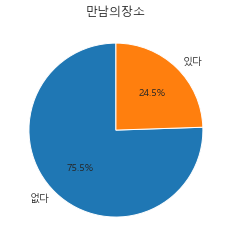

In [26]:
# 편의시설 비율 - pie chart
# 1.만남의장소
labels = ['없다', '있다']
ratio = [0.755224, 0.244776]
plt.pie(ratio, labels=labels,  startangle=90,  autopct='%0.1f%%')
plt.title('만남의장소')
plt.show()

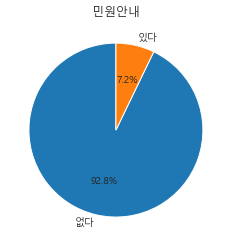

In [27]:
# 2.민원안내
labels = ['없다', '있다']
ratio = [0.928358, 0.071642]
plt.pie(ratio, labels=labels,  startangle=90,  autopct='%0.1f%%')
plt.title('민원안내')
plt.show()

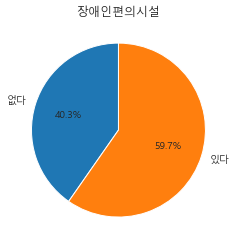

In [28]:
# 3.장애인편의시설
labels = ['없다', '있다']
ratio = [0.402985, 0.597015]
plt.pie(ratio, labels=labels,  startangle=90,  autopct='%0.1f%%')
plt.title('장애인편의시설')
plt.show()

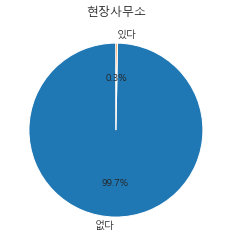

In [29]:
# 4.현장사무소
labels = ['없다', '있다']
ratio = [0.997015, 0.002985]
plt.pie(ratio, labels=labels,  startangle=90,  autopct='%0.1f%%')
plt.title('현장사무소')
plt.show()

In [30]:
# 현장사무소 있는 곳 한 곳 = 강동역
is_hyun = df['현장사무소'] == 1
where_hyun = df[is_hyun]
where_hyun

,기준_년_코드,역명,호선,장애인편의시설,만남의장소,현장사무소,민원안내,환승주차장,지하철이용객수,자전거보관가능대수,...,구간이동전입_3년,구간이동전출_3년,시도간이동전입_3년,시도간이동전출_3년,거주_세대_수_3년,거주인구_총계_3년,거주인구_남자_3년,거주인구_여자_3년,세대당인구_3년,고령자_65세이상_3년
10,2016,강동역,5,1,1,1,0,0,0.691263,0.80548,...,0,0,0,0,0,0,0,0,0,0


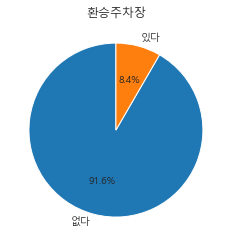

In [31]:
# 5.환승주차장
labels = ['없다', '있다']
ratio = [0.916418, 0.083582]
plt.pie(ratio, labels=labels,  startangle=90,  autopct='%0.1f%%')
plt.title('환승주차장')
plt.show()

대부분의 지하철역에 편의시설 없음

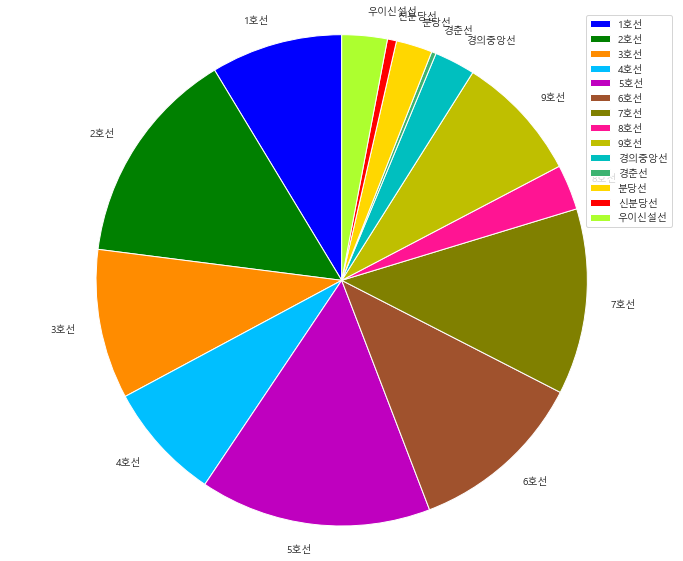

In [32]:
#호선별 색상 지정
colors = ['b','g','darkorange','deepskyblue','m','sienna','olive','deeppink','y','c','mediumseagreen','gold','r','greenyellow']

#호선별 비율 - pie chart
fig, ax = plt.subplots(1,1, figsize = (12,10))
labels = ['1호선', '2호선', '3호선', '4호선', '5호선','6호선','7호선','8호선','9호선','경의중앙선','경춘선','분당선','신분당선','우이신설선']
ratio = [0.086567, 0.143284, 0.098507, 0.077612, 0.152239,0.116418,0.122388,0.029851,0.083582,0.026866,0.002985,0.023881,0.005970,0.029851]
plt.pie(ratio, labels=labels,  startangle=90, colors=colors)
plt.legend(labels)
plt.axis('equal')
plt.show()

서울시 데이터이므로 1호선, 4호선은 실제보다 더 적을것

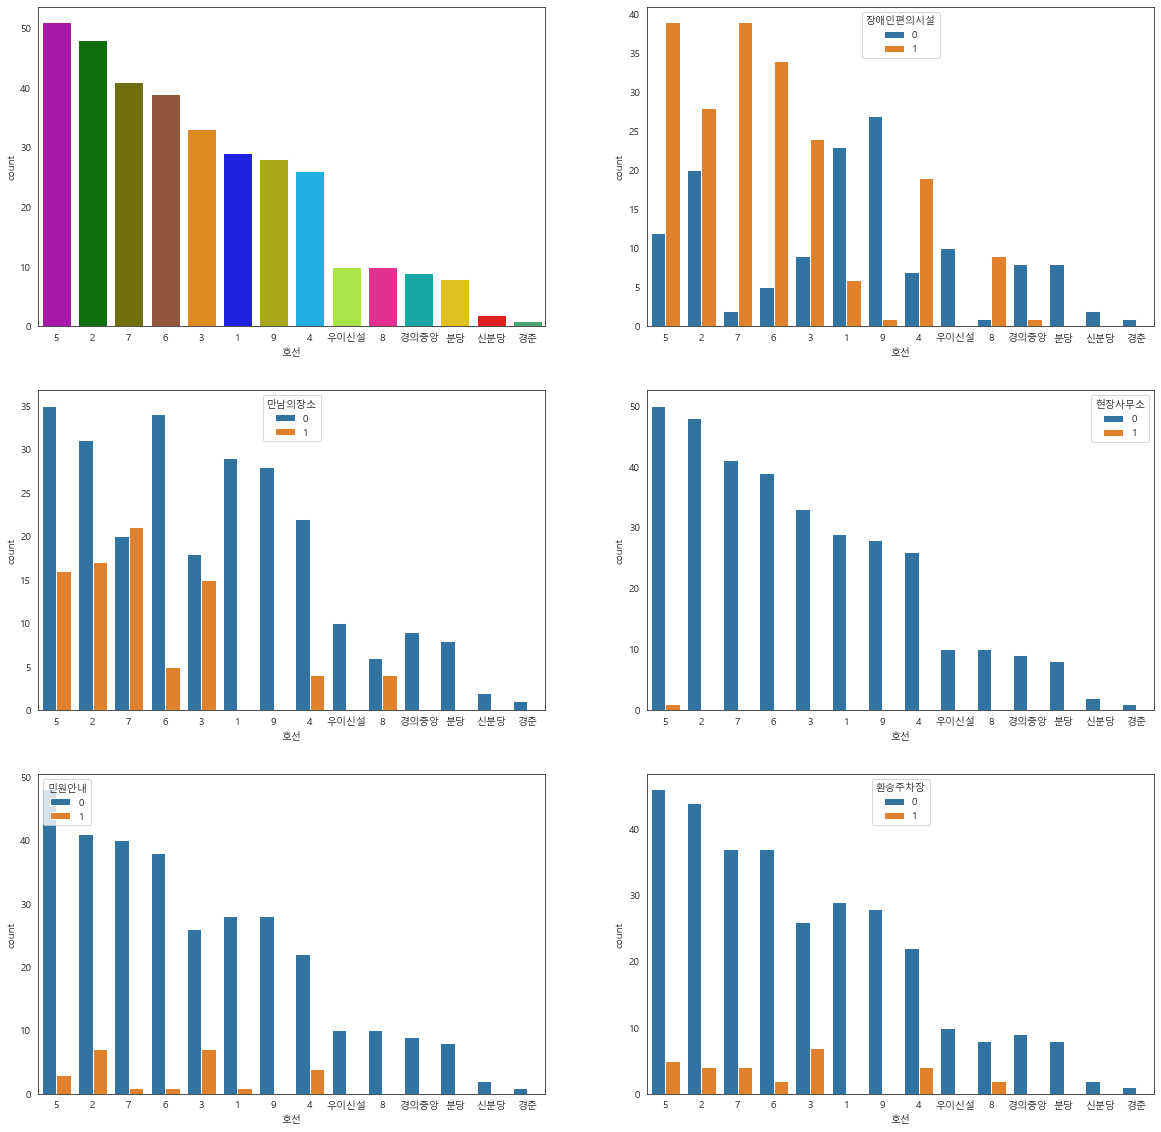

In [33]:
# 호선별 편의시설 비율
colors = ['m','g','olive','sienna','darkorange','b','y','deepskyblue','greenyellow','deeppink','c','gold','r','mediumseagreen']
flg, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
sns.countplot(x = '호선', data=df, ax=ax[0,0], palette=colors, order=df['호선'].value_counts().index)
sns.countplot(x = '호선', hue = '장애인편의시설', data = df, ax=ax[0,1], order=df['호선'].value_counts().index)
sns.countplot(x = '호선', hue = '만남의장소', data = df, ax=ax[1,0], order=df['호선'].value_counts().index)
sns.countplot(x = '호선', hue = '현장사무소', data = df, ax=ax[1,1], order=df['호선'].value_counts().index)
sns.countplot(x = '호선', hue = '민원안내', data = df, ax=ax[2,0], order=df['호선'].value_counts().index)
sns.countplot(x = '호선', hue = '환승주차장', data = df, ax=ax[2,1], order=df['호선'].value_counts().index)

장애인편의시설은 대부분 갖춰져 있었으나, 추가적인 편의시설(만남의장소 ~ 환승주차장)은 2~8호선에 잘 갖춰져있음

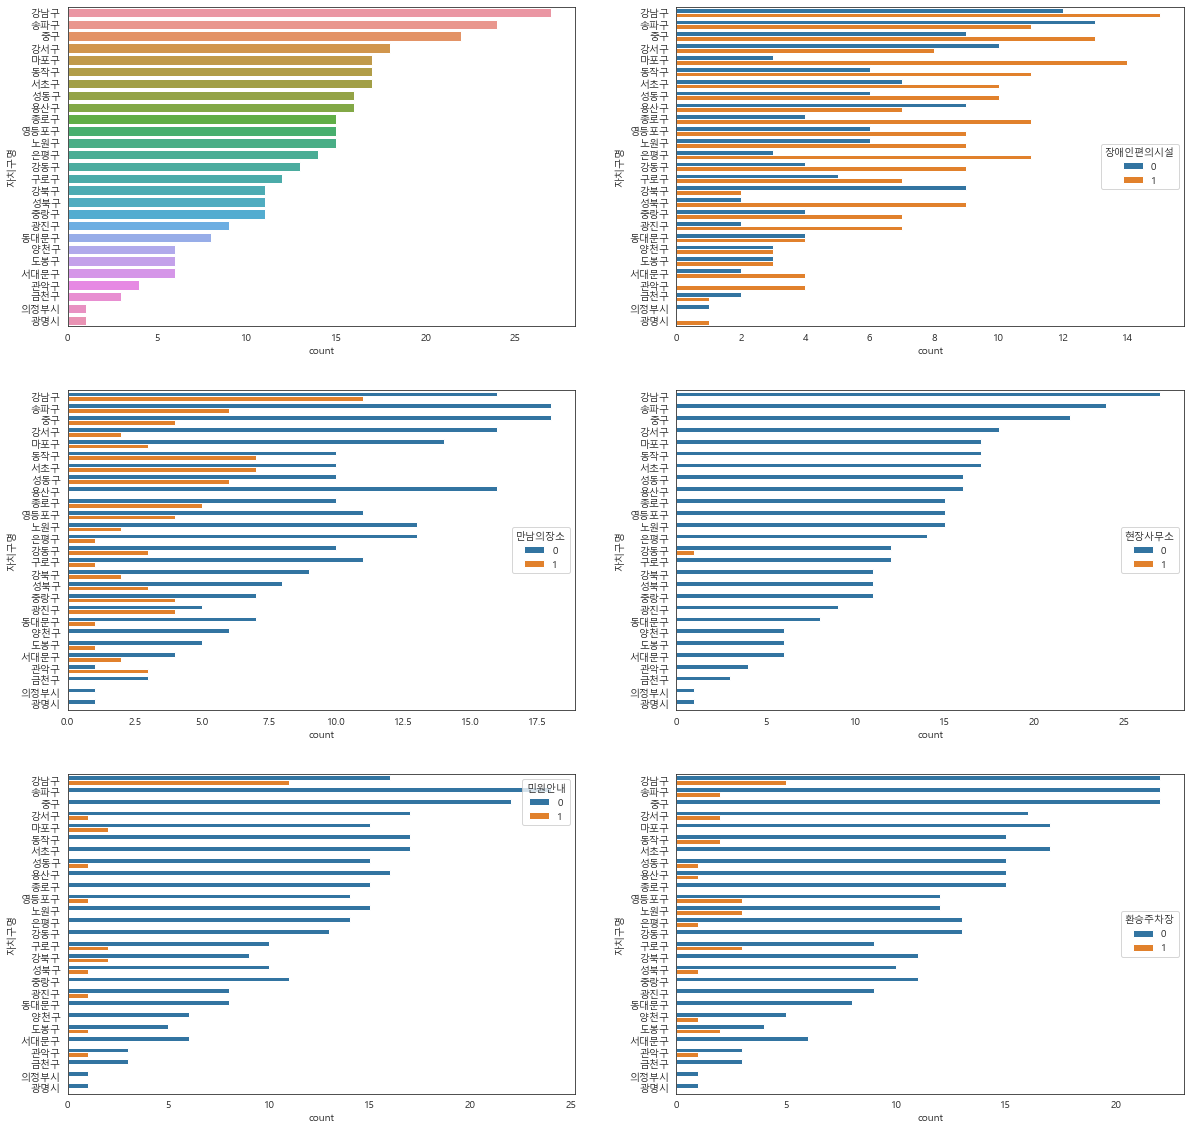

In [34]:
# 자치구별 편의시설
flg, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
sns.countplot(y='자치구명', data=df, ax=ax[0,0], order=df['자치구명'].value_counts().index)
sns.countplot(y = '자치구명', hue = '장애인편의시설', data = df, ax=ax[0,1], order=df['자치구명'].value_counts().index)
sns.countplot(y = '자치구명', hue = '만남의장소', data = df, ax=ax[1,0], order=df['자치구명'].value_counts().index)
sns.countplot(y = '자치구명', hue = '현장사무소', data = df, ax=ax[1,1], order=df['자치구명'].value_counts().index)
sns.countplot(y = '자치구명', hue = '민원안내', data = df, ax=ax[2,0], order=df['자치구명'].value_counts().index)
sns.countplot(y = '자치구명', hue = '환승주차장', data = df, ax=ax[2,1], order=df['자치구명'].value_counts().index)

강남구(동남권), 성동구(동북권)이 잘 구비되어있다.

    '서북권': ['은평구','서대문구','마포구'],
    '서남1권': ['강서구','양천구'],
    '서남2권': ['구로구','영등포구','금천구'],
    '서남3권': ['동작구','관악구'],
    '동북1권': ['중랑구','동대문구','성동구','광진구'],
    '동북2권': ['도봉구','노원구','강북구','성북구'],
    '동남1권': ['서초구','강남구'],
    '동남2권': ['강동구','송파구'],
    '도심권':  ['종로구','중구','용산구']

In [35]:
# 새로운 컬럼 생성
df['생활권'] =  df['자치구명']

In [36]:
# 서북권, 서남권, 동북권, 동남권, 도심권 5가지로 분류
df['생활권'][(df['생활권'] == '은평구') | (df['생활권'] == '서대문구') | (df['생활권'] == '마포구')] = '서북권'
df['생활권'][(df['생활권'] == '강서구') | (df['생활권'] == '양천구') | (df['생활권'] == '구로구') | (df['생활권'] == '영등포구') | (df['생활권'] == '금천구') | (df['생활권'] == '동작구') | (df['생활권'] == '관악구')] = '서남권'
df['생활권'][(df['생활권'] == '중랑구') | (df['생활권'] == '동대문구') | (df['생활권'] == '성동구') | (df['생활권'] == '광진구') | (df['생활권'] == '노원구')| (df['생활권'] == '강북구')| (df['생활권'] == '도봉구')| (df['생활권'] == '성북구')] = '동북권'
df['생활권'][(df['생활권'] == '서초구') | (df['생활권'] == '강남구') | (df['생활권'] == '강동구')| (df['생활권'] == '송파구')] = '동남권'
df['생활권'][(df['생활권'] == '종로구') | (df['생활권'] == '중구') | (df['생활권'] == '용산구')] = '도심권'

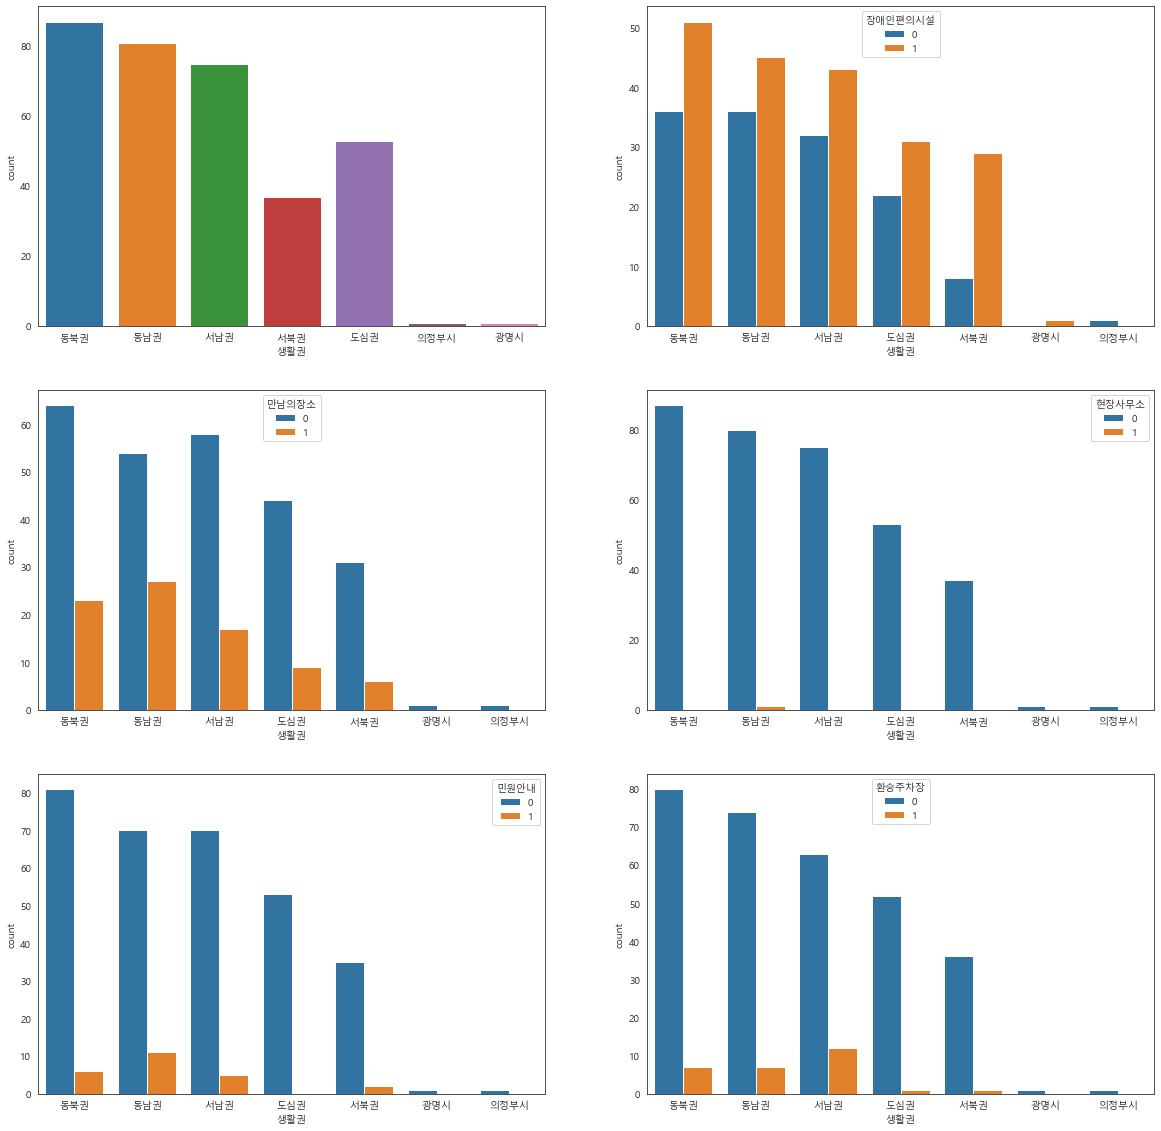

In [37]:
# 생활권별 편의시설
flg, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
sns.countplot(x = '생활권', data=df, ax=ax[0,0])
sns.countplot(x = '생활권', hue = '장애인편의시설', data = df, ax=ax[0,1], order=df['생활권'].value_counts().index)
sns.countplot(x = '생활권', hue = '만남의장소', data = df, ax=ax[1,0], order=df['생활권'].value_counts().index)
sns.countplot(x = '생활권', hue = '현장사무소', data = df, ax=ax[1,1], order=df['생활권'].value_counts().index)
sns.countplot(x = '생활권', hue = '민원안내', data = df, ax=ax[2,0], order=df['생활권'].value_counts().index)
sns.countplot(x = '생활권', hue = '환승주차장', data = df, ax=ax[2,1], order=df['생활권'].value_counts().index)

# 동북,동남,서남권에 상대적으로 더 많은 지하철역과 편의시설이 마련되어 있으며,
# 그중에서도 동남권이 높은 편이다.

동북권, 동남권이 근소하지만 더 높은 수치